## Aula 1

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

In [5]:
# tendencia - direção
# sazonalidade - recorrência das oscilações
# resíduos - o que sobra de sinal

In [6]:
df_path = ('https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv')

In [7]:
df = pd.read_csv(df_path)
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [9]:
df.index = pd.to_datetime(df.DATE, format='%m-%d-%Y') #type: ignore

In [10]:
df.drop('DATE', inplace=True, axis=1)

In [11]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [12]:
df.loc['1985-05-01']

Value    55.3151
Name: 1985-05-01 00:00:00, dtype: float64

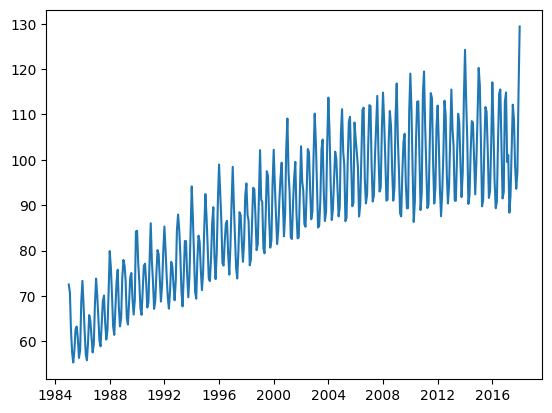

In [13]:
plt.plot(df.index, df.Value)

In [14]:
resultados = seasonal_decompose(df)

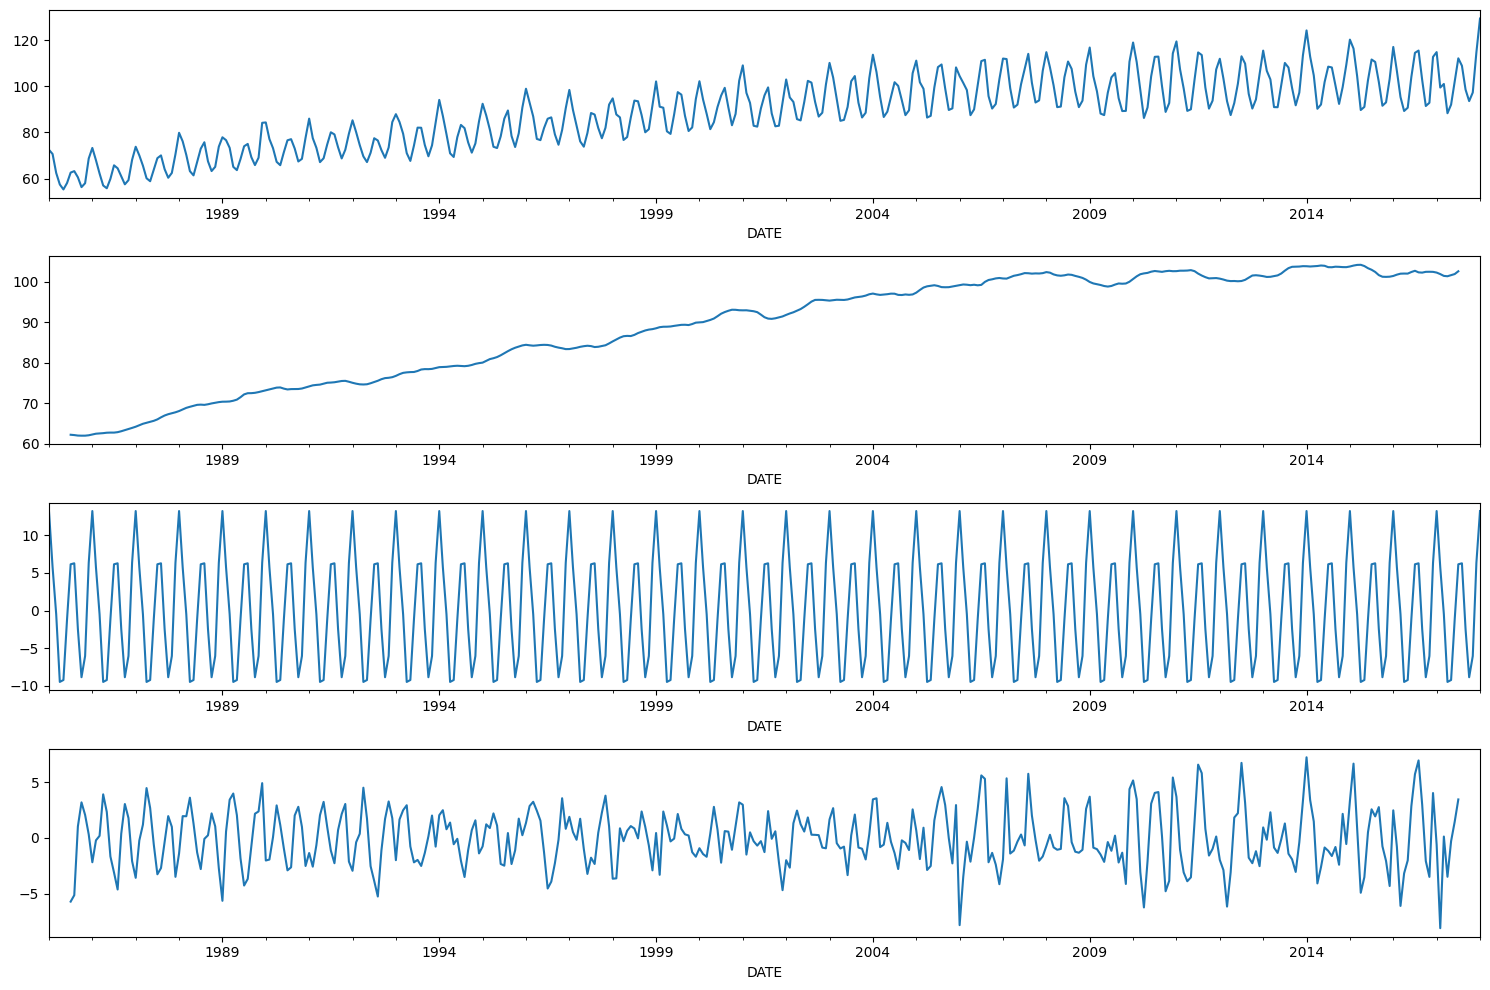

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [16]:
# Sério estacionária ou não estacionária

# Testes

# ADF - Augmented Dickey Fuller

# H0 - Hipótese Nula (não é estacionária)
# H1 - Hipótese Alternativa (rejeição da hipótese nula)

# p-value = 0.05 (5%), então rejeitamos H0 com um nível de confiança de 95%

In [17]:
sns.set_style('darkgrid')

In [18]:
X = df.Value.values

In [19]:
result = adfuller(X)

print('Teste ADf')
print(f'Teste estatistico: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Valores criticos:')

for key, value in result[4].items(): #type: ignore
    print(f'\t{key}: {value}')

Teste ADf
Teste estatistico: -2.2569903500472344
P-Value: 0.18621469116587125
Valores criticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


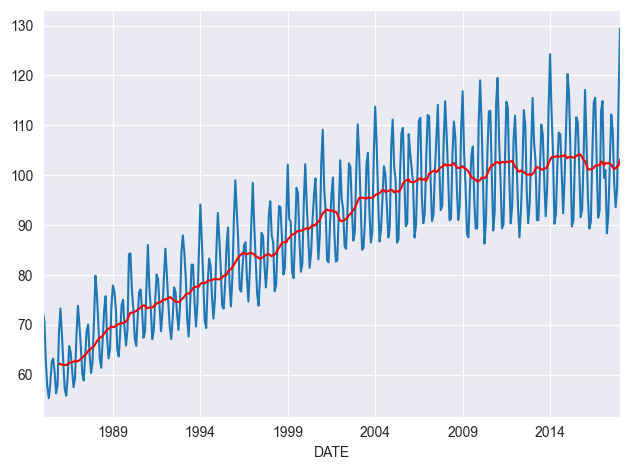

In [20]:
ma = df.rolling(12).mean()
f, ax = plt.subplots()
df.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

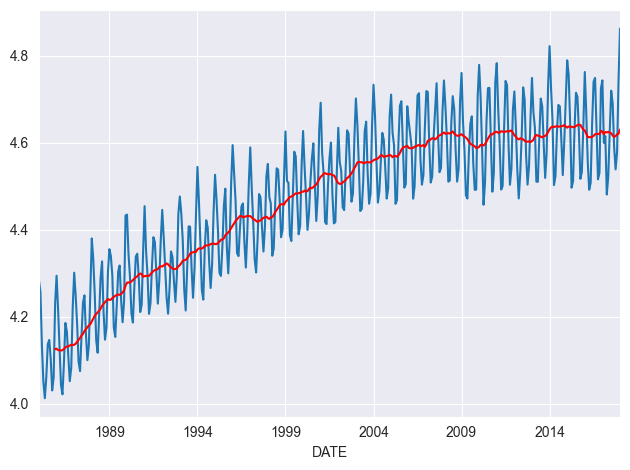

In [21]:
df_log = np.log(df)
ma_log = df_log.rolling(12).mean() #type: ignore
f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False) #type: ignore
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

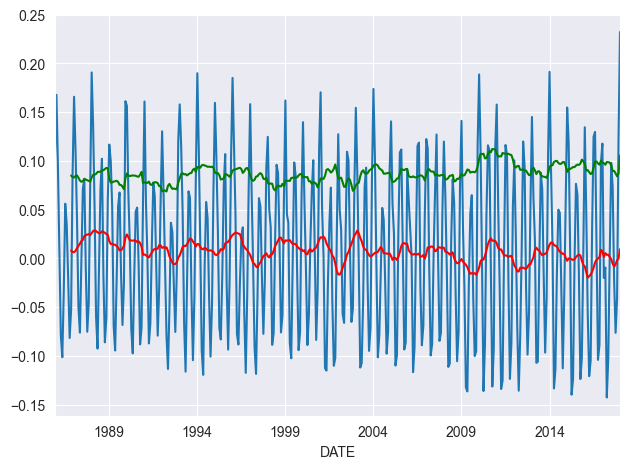

In [22]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std = df_s.rolling(12).std()
f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

In [23]:
X_s = df_s.Value.values
result = adfuller(X_s)

print('Teste ADf')
print(f'Teste estatistico: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Valores criticos:')

for key, value in result[4].items(): #type: ignore
    print(f'\t{key}: {value}')

Teste ADf
Teste estatistico: -5.211586185365434
P-Value: 8.32563975994635e-06
Valores criticos:
	1%: -3.448147967010838
	5%: -2.8693833397824413
	10%: -2.5709483564645725


Teste ADf
Teste estatistico: -7.6511295681451985
P-Value: 1.78812673543548e-11
Valores criticos:
	1%: -3.448294490928673
	5%: -2.869447722240253
	10%: -2.570982681065269


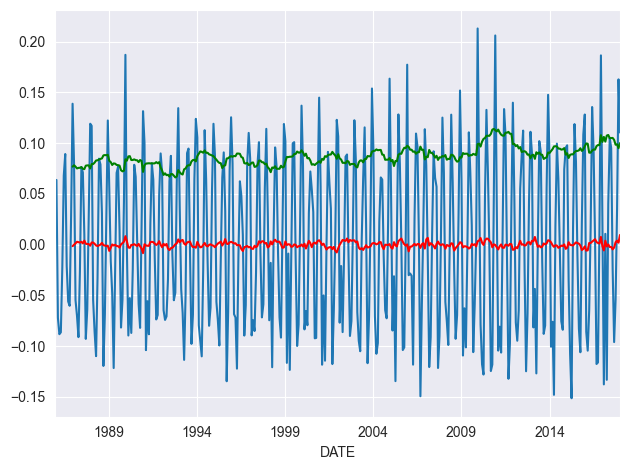

In [24]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()
f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.Value.dropna().values
result = adfuller(X_diff)

print('Teste ADf')
print(f'Teste estatistico: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Valores criticos:')

for key, value in result[4].items(): #type: ignore
    print(f'\t{key}: {value}')

## Aula 2

In [25]:
df = pd.read_csv(df_path, parse_dates=[0], index_col='DATE')
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   397 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [27]:
# dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True) #converter tipo

In [28]:
df.loc['2000-05-01']

Value    84.4552
Name: 2000-05-01 00:00:00, dtype: float64

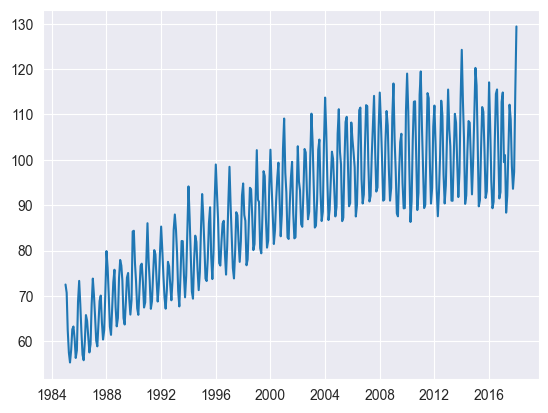

In [29]:
plt.plot(df.index, df.Value)

In [30]:
resultados = seasonal_decompose(df)

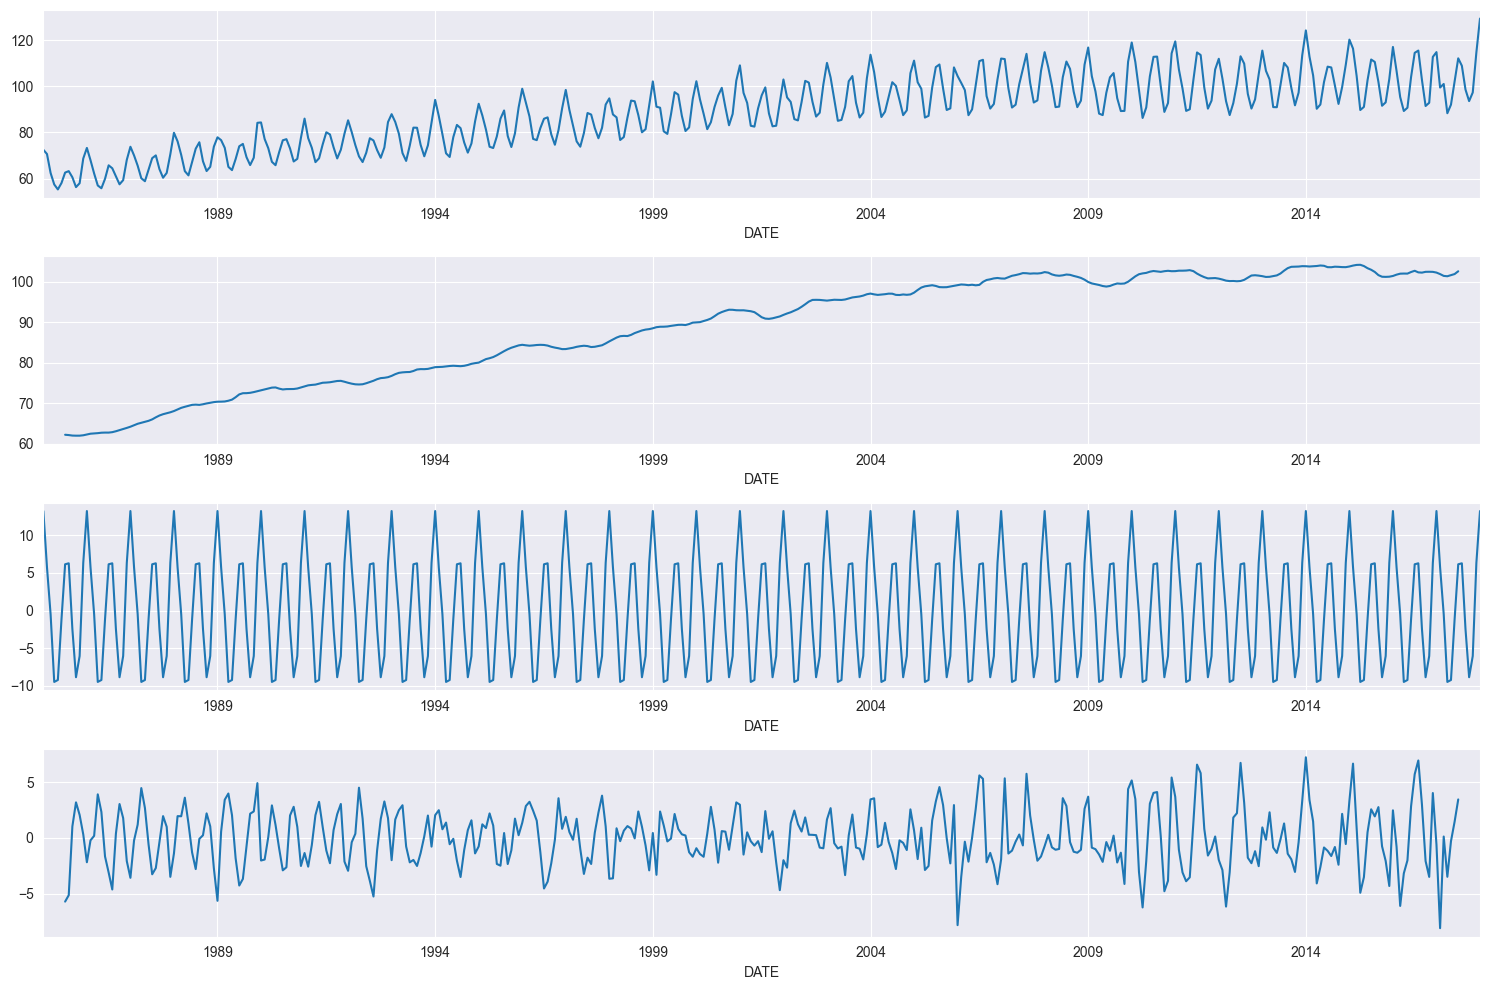

In [31]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

## Aula 3

In [32]:
# Prophet

In [33]:
# Faltam videos na plataforma

## Aula 4

In [34]:
result = adfuller(X)

print('Teste ADf')
print(f'Teste estatistico: {result[0]}')
print(f'P-Value: {result[1]}')
print(f'Valores criticos:')

for key, value in result[4].items(): #type: ignore
    print(f'\t{key}: {value}')

Teste ADf
Teste estatistico: -2.2569903500472344
P-Value: 0.18621469116587125
Valores criticos:
	1%: -3.4476305904172904
	5%: -2.869155980820355
	10%: -2.570827146203181


In [35]:
# ARIMA - (AR): Autoregressivo, I: Integrado, MA: Moving Average-Media Móvel

# A(x, y, z) - ACF, PACF

In [36]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

In [37]:
# 5% ACF

# 1.96/sqrt(N-d) -> N número de pontos do dataframe e d é o número de vezes qeu nos diferenciamos o dataframe

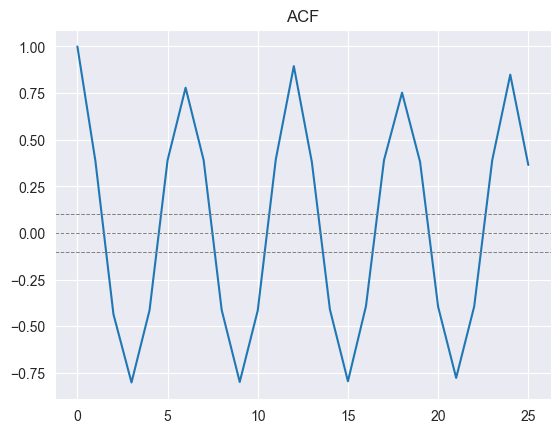

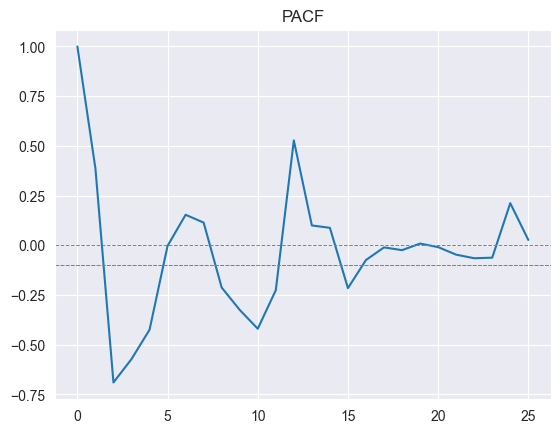

In [38]:
plt.plot(lag_acf)
plt.axhline(y=-1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.title('ACF')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=-1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray', linewidth=0.7)
plt.title('PACF')
plt.show()

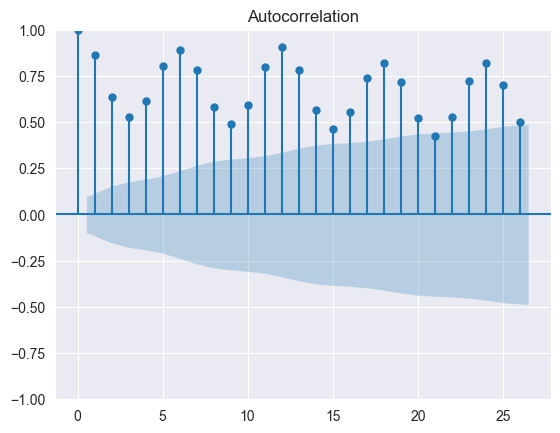

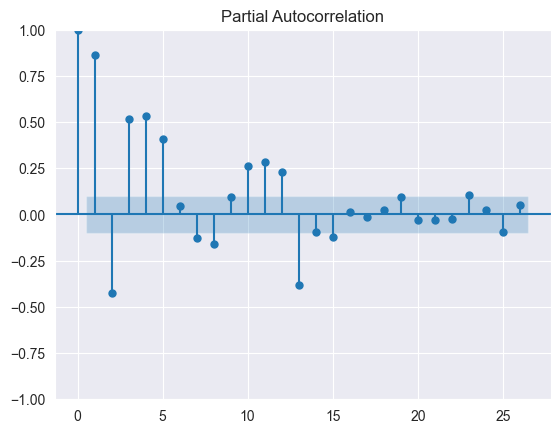

In [39]:
plot_acf(df.Value)
plot_pacf(df.Value)
plt.show()

## Aula 5

In [ ]:
df_novo = pd.read_csv('../../../Data/Fase 2/train.csv', index_col='id', parse_dates=['date'])

In [ ]:
df_novo.head()

In [ ]:
df_novo['store_nbr'].unique()

In [ ]:
df_1 = df_novo.loc[df_novo['store_nbr'] == 1, ['date', 'family', 'sales']]
df_1 = df_1.rename(columns={'date': 'ds', 'sales': 'y', 'family': 'unique_id'})

In [ ]:
df_1

In [ ]:
treino = df_1.loc[df_1['ds'] < '2014-01-01']
valid = df_1.loc[(df_1['ds'] >= '2014-01-01') & (df_1['ds'] < '2014-04-01')]
h = valid['ds'].nunique()

In [ ]:
h

In [3]:
# erro percentual absoluto através de pesos
def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [ ]:
# baseline
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_df['y'].values, forecast_df['Naive'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)#por padrao potly

# baseline não funciona bem neste caso

In [ ]:
forecast_df

In [ ]:
# baseline com sazonalidade
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)#por padrao potly

In [ ]:
forecast_dfs

In [ ]:
# baselne com janela de sazonalidade
model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_sm.fit(treino)

forecast_dfsm = model_sm.predict(h=h, level=[90])
forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasonalWindowAverage'].values)
print(f"WMAPE: {wmape3:.2%}")

model_sm.plot(treino, forecast_dfsm, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)#por padrao potly

In [ ]:
forecast_dfsm

In [ ]:
# ARIMA 
# AR: Alha para as vendas do passado e tenta achar uma correlação futura
# I: Quantidade que a série foi diferenciada
# MA: Média model

model_a = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)#por padrao potly

In [ ]:
forecast_dfa

In [ ]:
model_u = StatsForecast(models=[Naive(), SeasonalNaive(season_length=7), AutoARIMA(season_length=7), SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
model_u.fit(treino)

forecast_dfu = model_u.predict(h=h, level=[90])
forecast_dfu = forecast_dfu.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape5 = wmape(forecast_dfu['y'].values, forecast_dfu['Naive'].values)
print(f"WMAPE: {wmape5:.2%}")
wmape6 = wmape(forecast_dfu['y'].values, forecast_dfu['SeasonalNaive'].values)
print(f"WMAPE: {wmape6:.2%}")
wmape7 = wmape(forecast_dfu['y'].values, forecast_dfu['AutoARIMA'].values)
print(f"WMAPE: {wmape7:.2%}")
wmape8 = wmape(forecast_dfu['y'].values, forecast_dfu['SeasonalWindowAverage'].values)
print(f"WMAPE: {wmape8:.2%}")

model_u.plot(treino, forecast_dfu, level=[90], unique_ids=['MEATS', 'PERSONAL CARE'], engine='matplotlib', max_insample_length=90)#por padrao potly

In [ ]:
forecast_dfu